In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)
import random

In [2]:
os.getcwd()

'C:\\Users\\DELL'

In [3]:
os.chdir("F:/traffic_sign")

In [4]:
data_dir="F:/traffic_sign"
train_path="Train"
test_path="Test"

img_height=30
img_width=30
channels=3

In [5]:
num_categories=len(os.listdir(train_path))
num_categories

43

In [6]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

### Data Visualization

[210, 2220, 2010, 1320, 2100, 2160, 780, 630, 420, 1110, 1200, 210, 2250, 360, 330, 390, 510, 270, 1500, 600, 240, 540, 270, 1410, 450, 780, 240, 689, 420, 1200, 390, 210, 2070, 300, 1980, 360, 240, 240, 1860, 420, 1440, 1410, 1470]


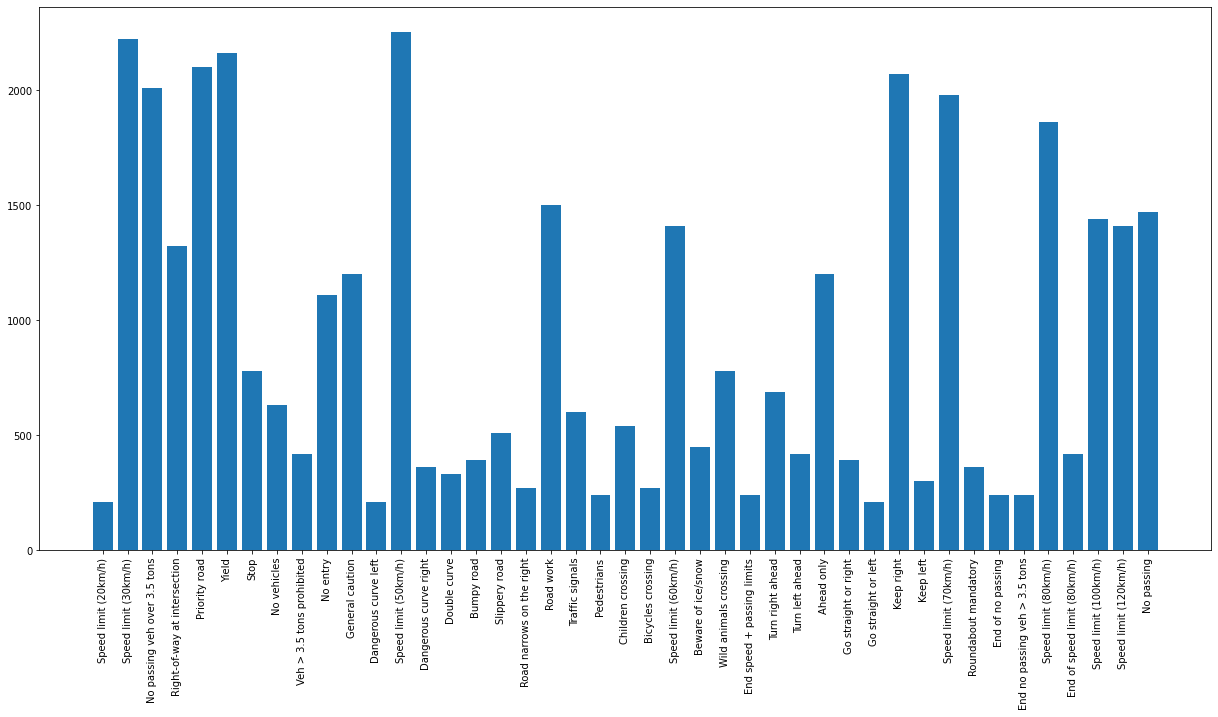

In [7]:
folders=os.listdir(train_path)

train_number=[]
class_num=[]

for folder in folders:
    train_files=os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
print(train_number)

plt.figure(figsize=(21,10))
plt.bar(class_num,train_number)
plt.xticks(class_num,rotation='vertical')
plt.show()

In [8]:
test=pd.read_csv(data_dir + '/Test.csv')
test.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


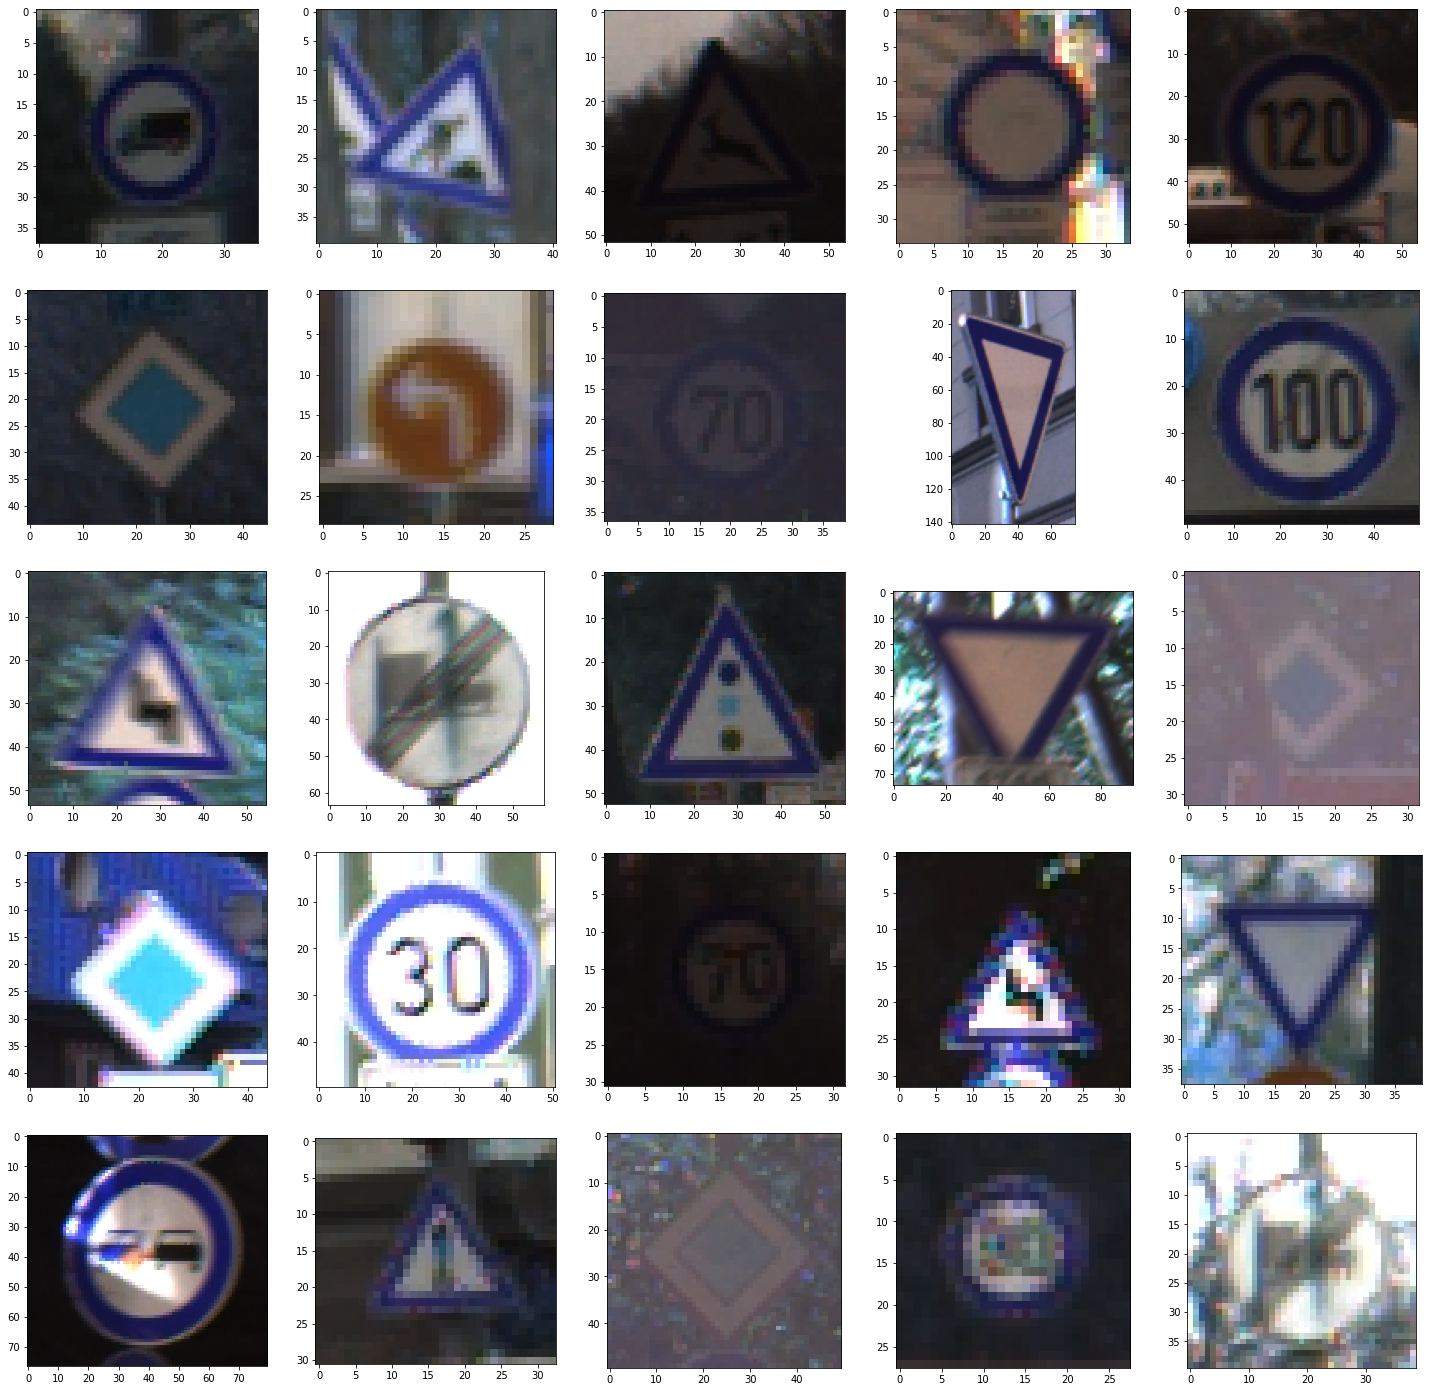

In [9]:
#Visualizing 25 random images from test data
imgs=test["Path"].values

plt.figure(figsize=(25,25))  #size of image is 25,25

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path=data_dir + '/' + random.choice(imgs)
    rand_img=cv2.imread(random_img_path)
    plt.imshow(rand_img)

### Collecting the Training Data

In [10]:
image_data=[]
image_labels=[]

for i in range(num_categories):
    path=data_dir + '/Train/' + str(i)
    images=os.listdir(path)
    
    for img in images:
        image=cv2.imread(path + '/' + img)
        image_fromarray=Image.fromarray(image,'RGB') #convrting images into an array
        resize_image=image_fromarray.resize((img_height,img_width))
        image_data.append(np.array(resize_image))
        image_labels.append(i)

#changing the list to numpy array
image_data=np.array(image_data)
image_labels=np.array(image_labels)

print(image_data.shape,image_labels.shape)

(39209, 30, 30, 3) (39209,)


### Dividing the data into train and validation set

In [11]:
X_train,X_val,y_train,y_val=train_test_split(image_data,image_labels,test_size=0.3,random_state=0,shuffle=True)

X_train=X_train/255
X_val=X_val/255

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(27446, 30, 30, 3)
(11763, 30, 30, 3)
(27446,)
(11763,)


In [12]:
# performing one hot encoding
y_train=keras.utils.to_categorical(y_train,num_categories)
y_val=keras.utils.to_categorical(y_val,num_categories)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


### Making the Model

In [13]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=16,kernel_size=(5,5),activation='relu',input_shape=(img_height,img_width,channels)),
    keras.layers.Conv2D(filters=32,kernel_size=(5,5),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64,kernel_size=(5,5),activation='relu'),
    keras.layers.Conv2D(filters=128,kernel_size=(5,5),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43,activation='softmax')
])

In [14]:
optimizer=Adam(learning_rate=0.01)

In [15]:
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [16]:
aug=ImageDataGenerator(rotation_range=10,
                       zoom_range=0.15,
                       width_shift_range=0.1,
                       height_shift_range=0.1,
                       shear_range=0.15,
                       horizontal_flip=False,
                       vertical_flip=False,
                       fill_mode="nearest"
                      )

In [17]:
history=model.fit(aug.flow(X_train,y_train,batch_size=32),epochs=30,validation_data=(X_val,y_val))

Epoch 1/30
858/858 [==============================] - 33s 38ms/step - loss: 3.1351 - accuracy: 0.2014 - val_loss: 1.9241 - val_accuracy: 0.4207
Epoch 2/30
858/858 [==============================] - 36s 42ms/step - loss: 1.6311 - accuracy: 0.4984 - val_loss: 0.8257 - val_accuracy: 0.7311
Epoch 3/30
858/858 [==============================] - 36s 42ms/step - loss: 0.9886 - accuracy: 0.6945 - val_loss: 1.0565 - val_accuracy: 0.7115
Epoch 4/30
858/858 [==============================] - 36s 42ms/step - loss: 0.6732 - accuracy: 0.7951 - val_loss: 0.3409 - val_accuracy: 0.9431
Epoch 5/30
858/858 [==============================] - 36s 42ms/step - loss: 0.4781 - accuracy: 0.8571 - val_loss: 0.1442 - val_accuracy: 0.9614
Epoch 6/30
858/858 [==============================] - 37s 43ms/step - loss: 0.3893 - accuracy: 0.8846 - val_loss: 0.2079 - val_accuracy: 0.9498
Epoch 7/30
858/858 [==============================] - 37s 43ms/step - loss: 0.3455 - accuracy: 0.9013 - val_loss: 0.0966 - val_accuracy:

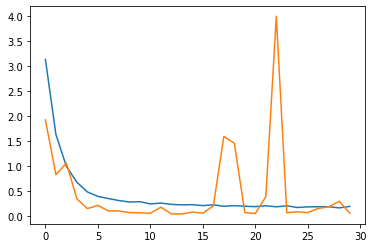

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

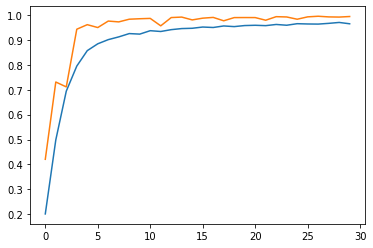

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

### Loading the test data for predicting

In [20]:
test=pd.read_csv(data_dir + '/Test.csv')
test.head()


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [21]:
labels=test["ClassId"].values
imgs=test["Path"].values

data=[]

for img in imgs:
    image=cv2.imread(data_dir + '/' + img)
    image_fromarray=Image.fromarray(image,'RGB')
    resize_image=image_fromarray.resize((img_height,img_width))
    data.append(np.array(resize_image))
    
X_test=np.array(data)
X_test=X_test/255  

pred=model.predict(X_test)

395/395 [==============================] - 3s 8ms/step


In [22]:
categorical_pred = np.argmax(pred, axis=1)
accuracy_score(labels,categorical_pred)

0.963895486935867

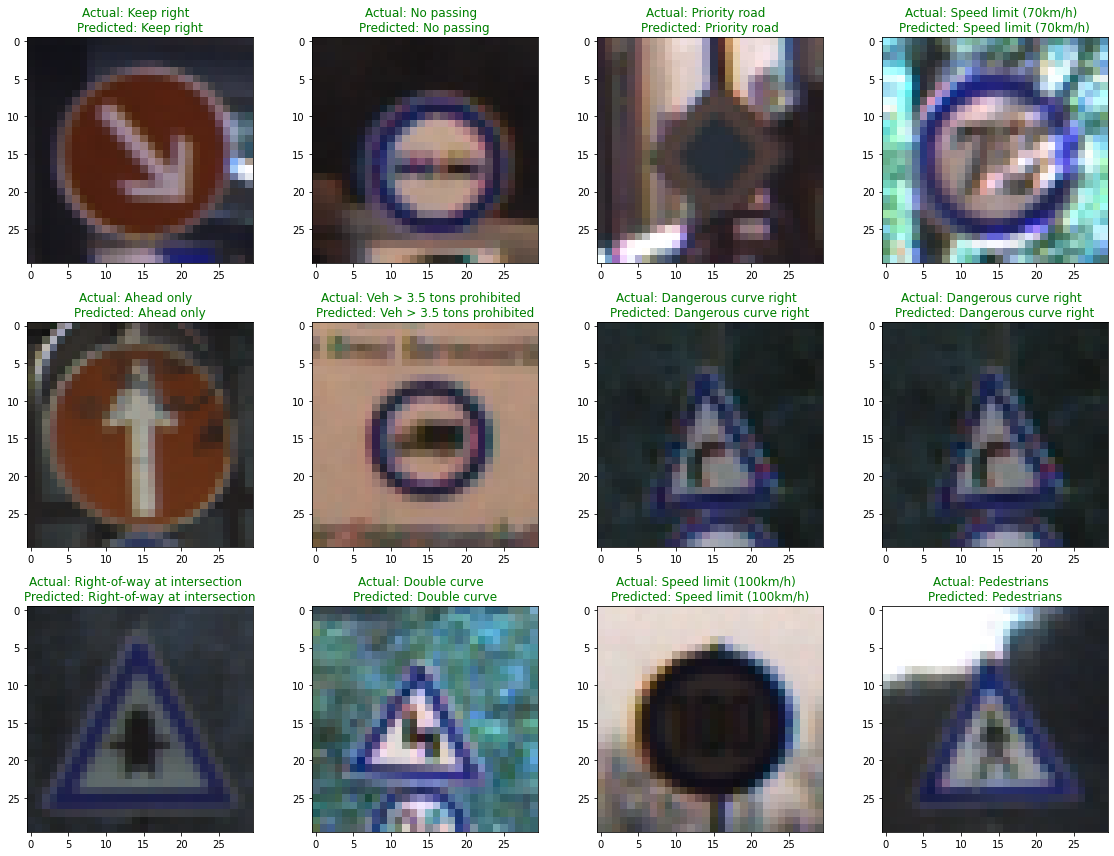

In [23]:
fig,ax=plt.subplots(3,4)
fig.set_size_inches(16,12)

for i in range(3):
    for j in range (4):
        idx=random.randint(0,42)
        ax[i,j].imshow(X_test[idx])
        if labels[idx] == categorical_pred[idx]:
            ax[i,j].set_title('Actual: '+classes[labels[idx]]+'  \nPredicted: '+classes[categorical_pred[idx]], color = 'green')
        else: 
            ax[i,j].set_title('Actual: '+classes[labels[idx]]+'  \nPredicted: '+classes[categorical_pred[idx]], color = 'red')

plt.tight_layout()

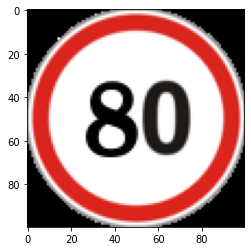

In [24]:
image = cv2.imread(data_dir + '/Meta/' + '5.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image)

In [25]:
exp=[]
image_fromarray=Image.fromarray(image,'RGB')
resize_image=image_fromarray.resize((img_height,img_width))
exp.append(np.array(resize_image))
    
trail=np.array(exp)
trail=trail/255

In [26]:
pred=model.predict(trail)

1/1 [==============================] - 0s 20ms/step


In [27]:
categorical_pred = np.argmax(pred, axis=1)

In [28]:
categorical_pred

array([6], dtype=int64)

In [29]:
classes[categorical_pred[0]]

'End of speed limit (80km/h)'